# Machine learning - week1 : Linear Regression

반갑습니다.

파이썬에서는 머신러닝을 실습할 때 사용할 수 있는 편한 모듈이 제공됩니다. 사이킷런을 사용할 수도 있고 텐서플로우를 사용하 수도 있습니다.

머신러닝을 처음 배울 때에는 위의 모듈들을 사용하지 않고 머신러닝 시스템을 만들어보고 실제 계산이 진행되는 내용을 코드로 살펴보는 것이 학습에 도움이 됩니다.

아래의 실습에서는 Numpy 모듈만 사용해서 간단한 선형회귀를 해보겠습니다.
(물론 Numpy 자체에도 선형회귀 함수가 있지만 사용하지 않습니다.)

실습에서 사용하는 데이터와 순서는 Andrew 교수의 코세라 수업에 나온 프로그래밍 숙제 내용을 기초로하고 있습니다.

In [86]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt

아래는 선형회귀를 할 때 필요한 함수를 정의해 두었습니다.

cost 함수와,  cost 함수의 기울기(gradient)를 구하는 함수, 그리고 Gradient descent 알고리즘으로 선형회귀 학습을 하는 과정을 함수로 담았습니다.

In [87]:
def addOnes(X):
    """helper function for vectorized computation
    Parameters
    ==========
    X : m x n matrix,  m = size of data, n = number of features
    
    Returns
    =======
    m x (n + 1) matrix where first column is filled with 1.
    """
    
    m = X.shape[0]
    ones = np.ones(m)
    onesX = np.column_stack((ones, X))
    return onesX

def computeCost(theta, X, y):
    """ compute cost(loss) for linear regression using sum of squared errors
    Parameters
    ==========
    X : m x n matrix,  m = size of data, n = number of features
    theta : (n + 1) x 1 matrix, theta[0] is for bias
    y : m x 1 matrix

    Returns
    =======
    cost value for given theta, X and y
    """
    X = addOnes(X)
    m = X.shape[0]
    theta = theta.reshape(-1,1) 
    y = y.reshape(-1,1)
    h = X @ theta  # X.dot(theta)
    J = np.sum((h - y) ** 2)
    J = J / (2. * m)
    return J

def computeCost2(X, y, theta0, theta1):
    m = X.shape[0]
    J = np.zeros((theta0.size, theta1.size))
    for i in range(theta0.size):
        for j in range(theta1.size):
            theta = np.array([[theta0[i]], [theta1[j]]])
            J[i,j] = computeCost(theta, X, y)
    return J

def computeGrad(theta, X, y):
    """ compute gradient """
    X = addOnes(X)
    m = X.shape[0]
    theta = theta.reshape(-1,1)
    y = y.reshape(-1,1)
    grad = np.zeros(len(theta))
    h = X @ theta
    grad = X.T @ (X.dot(theta) - y)
    grad = grad / (1.* m)
    grad = grad.ravel()
    return grad

def gradient_descent(X, y,alpha = 0.01, numIter = 1500):
    """ minimize theta by using gradient descent method
    Theta is initialized with zeros.
    
    Parameters
    ==========
    X: input data with n features
    y: labled real data 
    alpha : learning rate for gradient descent algorithm
    numIter : number of iterations for gradient descent
    
    Returns
    ========
    theta : minimized value for weights(coefficients for features and bias term)
    J_history : cost values for every iteration
    """
    X = addOnes(X)
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n, 1))
    J_history = np.zeros(numIter)
    for i in range(0, numIter):
        h = X.dot(theta)
        J_history[i] = np.sum((h - y) ** 2) / (2. * m)
        gradient =  X.T @ (X.dot(theta) - y) / m
        theta = theta - alpha * gradient
    return (theta, J_history)

In [88]:
data = np.loadtxt('../data/ex1data1.txt',  delimiter=","); data.shape

(97, 2)

사용할 데이터는 'ex1data1.txt' 파일에 들어있는데,  92 개의 data set 이 있습니다.
각 라인의 마지막 숫자는 y 값에 해당하고 그 이전까지는 x 의 피쳐(들)에 해당하는 값입니다.

이 데이터에서 피처의 갯수는 1이 됩니다.

In [89]:
X = data[:,:data.shape[1] - 1]; X.shape

(97, 1)

In [90]:
y = data[:,data.shape[1] - 1:]; y.shape

(97, 1)

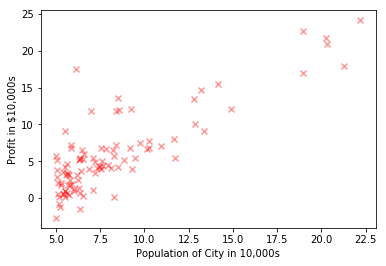

In [91]:
#  scatter plot reference: https://plot.ly/matplotlib/scatter/
plt.scatter(X,y, color='r', marker='x', alpha=.4)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

이 데이터의 x 값은 어떤 도시의 인구수이고,  y 값은 제 기억이 정확하다면 그 도시에서의 푸드트럭의 수익입니다.

인구수가 많을 수록 매출이 높은 경향을 보이는 것은 상식적으로 쉽게 납득이 됩니다.

데이터를 잘 보면 수익이 마이너스로 적자가 난 케이스도 있습니다.

In [92]:
theta_test = np.array([[0],[0]])
cost1 = computeCost(theta_test, X, y)
print(cost1)

cost2 = computeCost2(X, y, np.array([0]), np.array([0]))
print(cost2)  # expected cost1 = cost2

32.0727338775
[[ 32.07273388]]


앞에서 정의한 함수가 잘 작동하는지 이미 알고 있는 값과 비교해보았습니다.

쎄타값이 [0,0] 일 때 예상되는 값은 32.07 인데 계산 결과와 일치합니다.


[[-3.63029144]
 [ 1.16636235]]


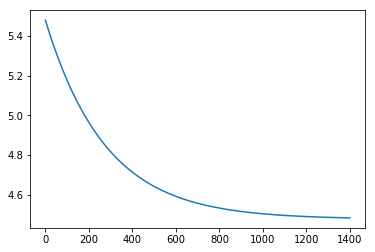

In [93]:
(theta_min, J) = gradient_descent(X, y) ;  print(theta_min)  #print((theta))  expected value :   -3.6303  1.1664
plt.plot(J[100:])
plt.show()

앞에서 정의한 Gradient descent 함수를 사용해서 실제로 학습을 시켜봤습니다.

결과로 나온 쎄타값은 미리 계산된 값과 어느정도 비슷합니다.  learning rate 와 iteration 횟수에 따라서 결과는 미세하게 달라질 수 있지만  cost 값이 부드럽게 수렴하는 그래프를 보니 제대로 학습되었다고 생각할 수 있습니다.

선형회귀에서는 비용함수가 global minimum 을 하나만 갖기 때문에 learning rate 만 적당한 값으로 정해주면 학습시키는 것은 어려운 일이 아닙니다.


---

학습한 결과로 선형회귀 그래프를 그려보겠습니다.

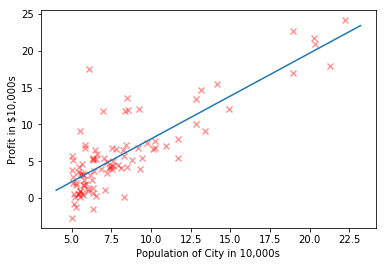

In [94]:
x_lin = np.linspace(np.min(X) - 1, np.max(X) + 1, 100)
plt.scatter(X,y, color='r', marker='x', alpha=.4)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(x_lin, addOnes(x_lin).dot(theta_min))
plt.show()

계산한 쎄타 [[-3.63029144],[ 1.16636235]]  에서 비용 함수가 최소값이 되는지는 위 그래프에서는 알기가 어렵습니다.

확인하기 위해서 비용 함수를 등고선 그래프로 그려보고 계산한 쎄타를 표시해보겠습니다.

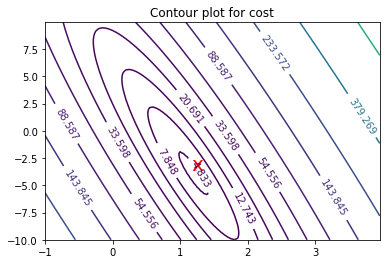

In [95]:
delta = 0.05
theta0 = np.arange(-1.0, 4.0, delta)
theta1 = np.arange(-10.0, 10.0, delta)

#theta = np.column_stack((x, y)); theta.shape
J = computeCost2(X, y, theta1, theta0); J.shape
plt.figure()
levels = np.logspace(-1, 3, 20) 
CS = plt.contour(theta0, theta1, J, levels=levels)

plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour plot for cost')
plt.text(theta_min[1],theta_min[0], 'x',  color='red', fontsize=20)

plt.show()

빨간색의 X 표시의 좌측 하단이 계산한 쎄타에 해당하는 좌표입니다.

비용함수가 최소가 되는 점과 상당히 근접해 있음을 확인할 수 있습니다.

실습한 선형회귀는 간단한 시스템으로 미분을 해서 산술적으로  최소값 좌표을 구할 수 있습니다. 그리고 그 값은 당연히 

이 실습에서 구한 값과 정확히 일치하지는 않습니다.

사이킷런이나 텐서플로우에서 제공하는 최적화된 알고리즘을 사용하면 훨씬 정확하게 최소값의 좌표를 구할 수 있습니다.